In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


**Load in Data**

In [15]:
df = pd.read_csv('working_data (2).csv')
gdp = pd.read_csv('working_file_with_savingsrate.csv')
gini = pd.read_csv('World_GINI (3).csv')

**Preparation of Data**

In [16]:
china_gini = gini[gini['Entity'] == 'China']
china_gdp = gdp[gdp['Country Name']== 'China']
df_final = pd.merge(df,china_gdp, on = 'Year', how = 'left')
df_final_2 = pd.merge(df_final, china_gini, on = 'Year', how = 'left')
df_final_2.loc[df_final_2['Year'] == 2021, 'Gini coefficient'] = 0.357
df_final_2 = df_final_2.drop(columns = ['Entity','Code'])
df_final_2.sort_values(by='Year', ascending=True, inplace=True)
df_filtered = df_final_2[df_final_2['Year'] >= 2000]
df_filtered = df_filtered[df_filtered['Year'] <= 2021]
df_filtered = df_filtered.reset_index().drop(columns = ['index'])


**Filling in Missing data**

In [17]:
df_filtered['Gini coefficient'] = df_filtered['Gini coefficient'].interpolate()


In [18]:
df_filtered['Percentage of Urban'] = df_filtered['Urban Population(10000 persons)'] / df_filtered['Total Population (year-end)(10000 persons)'] * 100

df_filtered['Percentage of Uni Educated'] = df_filtered['Number of Graduates Regular Undergraduates and College Students(10000 persons)'] / df_filtered['Total Population (year-end)(10000 persons)'] * 100

df_filtered['Percentage of Economically Active'] = df_filtered['Economically Active Population(10000 persons)'] / df_filtered['Total Population (year-end)(10000 persons)'] * 100

df_filtered['Percentage of Internet Literacy'] = df_filtered['Number of Internet Users(10000 persons)'] / df_filtered['Total Population (year-end)(10000 persons)'] * 100

df_filtered['Percentage of passenger traffic of railways'] = df_filtered['Passenger Traffic of Railways(10000 persons)'] / df_filtered['Total Population (year-end)(10000 persons)'] * 100


**Dicky Fuller Test**

In [19]:
from statsmodels.tsa.stattools import adfuller

def adf_check(time_series):
    # Perform the ADF test
    result = adfuller(time_series)

    # Display the results
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']

    for value, label in zip(result, labels):
        print(f"{label} : {value}")

    # Interpret the results
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis.")
        print("Data has no unit root and is stationary.")
    else:
        print("Weak evidence against the null hypothesis, time series has a unit root, indicating it is non-stationary.")

In [20]:
exog_var = ['Expenditure on R&D(100 million yuan)','Total Population (year-end)(10000 persons)','Percentage of Uni Educated','Government Appropriation for Education(10000 yuan)','Percentage of passenger traffic of railways','Percentage of Economically Active','Percentage of Internet Literacy', 'Number of Beds of Medical Institutions(10000 units)','Percentage of Urban']
# Calculate the percentage change
differenced = df_filtered[exog_var].diff()

# Create new column names by appending ' growth rate' to each original column name
diff_columns = [col + ' diff' for col in exog_var]

# Assign the percentage change to the new columns in df_filtered
df_filtered[diff_columns] = differenced

**Testing for stationarity**

In [21]:
df_filtered['Gini coefficient_firstdiff'] = df_filtered['Gini coefficient'].diff()

In [22]:
df_filtered

,Year,Expenditure on R&D(100 million yuan),Total Population (year-end)(10000 persons),Urban Population(10000 persons),Number of Graduates Regular Undergraduates and College Students(10000 persons),Government Appropriation for Education(10000 yuan),Passenger Traffic of Railways(10000 persons),Economically Active Population(10000 persons),Number of Internet Users(10000 persons),Number of Beds of Medical Institutions(10000 units),...,Expenditure on R&D(100 million yuan) diff,Total Population (year-end)(10000 persons) diff,Percentage of Uni Educated diff,Government Appropriation for Education(10000 yuan) diff,Percentage of passenger traffic of railways diff,Percentage of Economically Active diff,Percentage of Internet Literacy diff,Number of Beds of Medical Institutions(10000 units) diff,Percentage of Urban diff,Gini coefficient_firstdiff
0,2000,896.00,126743,45906,95.0000,25626056.0,105072.50,73992.0,2250.0,317.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001,1042.49,127627,48064,103.6000,30570100.0,105155.00,73884.0,3370.0,320.10,...,146.49,884.0,0.006219,4944044.0,-0.509574,-0.488984,0.865261,2.40,1.439991,NaN
2,2002,1287.64,128453,50212,133.7000,34914048.0,105606.00,74492.0,5910.0,313.60,...,245.15,826.0,0.022911,4343948.0,-0.178712,0.101067,1.960398,-6.50,1.430041,NaN
3,2003,1539.63,129227,52376,187.7000,38506237.0,97260.00,74911.0,7950.0,316.40,...,251.99,774.0,0.041164,3592189.0,-6.950819,-0.023103,1.551061,2.80,1.440446,-0.003617
4,2004,1966.33,129988,54283,239.1000,44658575.0,111764.00,75290.0,9400.0,326.80,...,426.70,761.0,0.038692,6152338.0,10.717335,-0.047805,1.079472,10.40,1.229779,-0.003617
5,2005,2449.97,130756,56212,306.8000,51610759.0,115583.00,76120.0,11100.0,336.75,...,483.64,768.0,0.050695,6952184.0,2.415699,0.294571,1.257657,9.95,1.229988,-0.003617
6,2006,3003.10,131448,58288,377.5000,63483648.0,125655.80,76315.0,13700.0,351.18,...,553.13,692.0,0.052550,11872889.0,7.197599,-0.158123,1.933278,14.43,1.353014,0.006881
7,2007,3710.24,132129,60633,447.8000,82802142.0,135670.00,76531.0,21000.0,370.11,...,707.14,681.0,0.051725,19318494.0,7.086414,-0.135753,5.471186,18.93,1.546234,0.006881
8,2008,4616.02,132802,62403,511.9498,104496296.0,146192.85,77046.0,29800.0,403.87,...,905.78,673.0,0.046587,21694154.0,7.403363,0.094267,6.545863,33.76,1.100259,0.006881
9,2009,5802.11,133450,64512,531.1000,122310935.0,152451.19,77510.0,38400.0,441.66,...,1186.09,648.0,0.012478,17814639.0,4.155114,0.065986,6.335401,37.79,1.352198,0.003900


In [23]:
adf_check(df_filtered['Gini coefficient'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : 1.9594395978378287
p-value : 0.9986178713049797
#Lags Used : 8
Number of Observations Used : 11
Weak evidence against the null hypothesis, time series has a unit root, indicating it is non-stationary.


In [24]:
adf_check(df_filtered['Gini coefficient'].diff().dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.0031236309352844
p-value : 0.03460372035214762
#Lags Used : 3
Number of Observations Used : 15
Strong evidence against the null hypothesis, reject the null hypothesis.
Data has no unit root and is stationary.


In [25]:
df_filtered = df_filtered.iloc[3:]

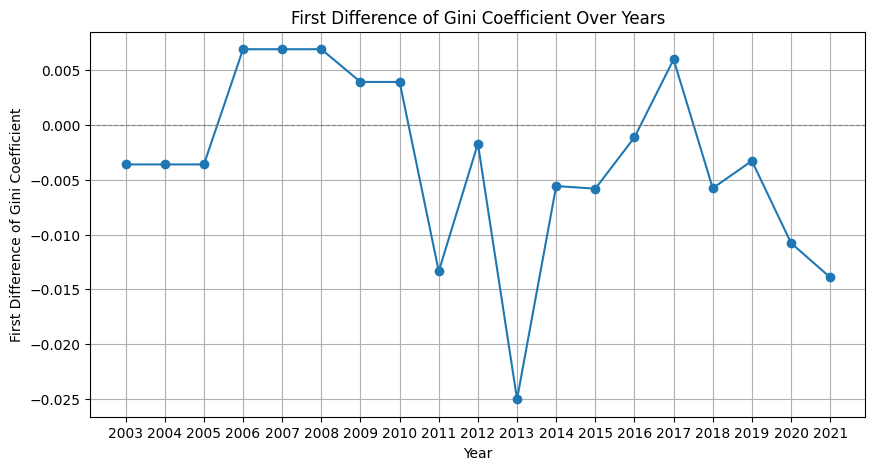

In [26]:
#Visualising
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df_filtered['Year'], df_filtered['Gini coefficient_firstdiff'], marker='o', linestyle='-')  # Exclude the first year for x-axis
plt.title('First Difference of Gini Coefficient Over Years')
plt.xlabel('Year')
plt.ylabel('First Difference of Gini Coefficient')
plt.grid()
plt.xticks(df_filtered['Year'])  # Show all years on the x-axis
plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()

**ACF PLOT**

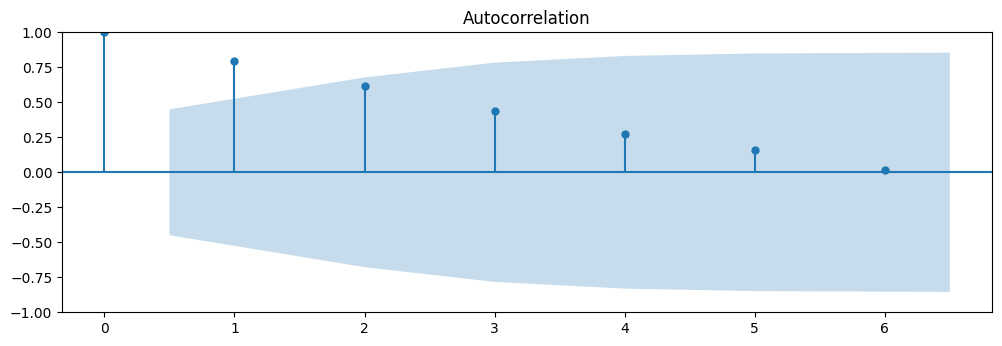

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_filtered['Gini coefficient'].dropna(), lags=6, ax=ax1)
plt.show()

**Grid Search for AIC/BIC**

In [28]:
# Define the range for p and q
p_values = range(0,3) # You can adjust the range as needed (e.g., 0 to 2)
q_values = range(0, 5)

# Create a DataFrame to store results
results = []

# Grid search over p and q values
for p in p_values:
    for q in q_values:
        try:
            # Fit ARIMA model
            model = sm.tsa.ARIMA(endog=df_filtered['Gini coefficient'],
                                  exog=df_filtered[diff_columns],
                                  order=(p, 0, q))  # d=0 since we want ARIMA(p, 0, q)
            results3 = model.fit()

            # Store AIC and BIC results
            results.append({'p': p, 'q': q, 'AIC': results3.aic, 'BIC': results3.bic})

        except Exception as e:
            # Print the exception if the model fails to fit
            print(f"Error fitting model with p={p}, q={q}: {e}")

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible s

In [29]:
results_df

,p,q,AIC,BIC
0,0,0,-68.447302,-58.058474
1,0,1,-104.809169,-93.475901
2,0,2,-96.790276,-84.512570
3,0,3,-88.964402,-75.742256
4,0,4,-95.266798,-81.100213
5,1,0,-104.680221,-93.346953
6,1,1,-102.998872,-90.721166
7,1,2,-97.792808,-84.570662
8,1,3,-94.423064,-80.256479
9,1,4,45.112062,60.223086


**ARIMAX Model**

In [30]:
model=sm.tsa.ARIMA(endog=df_filtered['Gini coefficient_firstdiff'],exog=df_filtered[diff_columns],order=[1,0,0])
results=model.fit()
print(results.summary())

                                   SARIMAX Results                                    
Dep. Variable:     Gini coefficient_firstdiff   No. Observations:                   19
Model:                         ARIMA(1, 0, 0)   Log Likelihood                  72.710
Date:                        Mon, 11 Nov 2024   AIC                           -121.420
Time:                                13:10:22   BIC                           -110.086
Sample:                                     0   HQIC                          -119.502
                                         - 19                                         
Covariance Type:                          opg                                         
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                 

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
